# Test Posos - A

# 1-  Chargement des données

In [1]:
import pandas as pd

In [2]:
df_input = pd.read_csv("input_train.csv", encoding = "utf8")
df_input.head()

,ID,question
0,0,"bonjour, je m suis trompé de forum pour ma qu..."
1,1,est ce que le motilium me soulagera contre les...
2,2,mon médecin m'a prescrit adenyl. au 2ème cache...
3,3,Est-ce qu'il existe une forme adaptée aux enfa...
4,4,mon medecin me soigne pour une rhino pha...


In [3]:
df_output = pd.read_csv("output_train.csv", encoding = "utf8")
df_output

,ID,intention
0,0,28
1,1,31
2,2,28
3,3,44
4,4,31
...,...,...
8023,8023,41
8024,8024,48
8025,8025,42
8026,8026,14


In [4]:
# Pas obligatoire
df = pd.merge(df_input,df_output,on='ID') 
df

,ID,question,intention
0,0,"bonjour, je m suis trompé de forum pour ma qu...",28
1,1,est ce que le motilium me soulagera contre les...,31
2,2,mon médecin m'a prescrit adenyl. au 2ème cache...,28
3,3,Est-ce qu'il existe une forme adaptée aux enfa...,44
4,4,mon medecin me soigne pour une rhino pha...,31
...,...,...,...
8023,8023,en combien de temps un antibio n'est plus prés...,41
8024,8024,j'ai fait vacciner de revaxis mon fils 'année ...,48
8025,8025,Un patient m’a ramené une ordonnance de 3x1g d...,42
8026,8026,"prise pillule du lendemain, faire une pause en...",14


# 2- Data exploration and visualisation

In [5]:
df.describe()

,ID,intention
count,8028.000000,8028.000000
mean,4013.500000,28.248754
std,2317.628314,12.001745
min,0.000000,0.000000
25%,2006.750000,22.000000
50%,4013.500000,28.000000
75%,6020.250000,34.000000
max,8027.000000,50.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8028 entries, 0 to 8027
Data columns (total 3 columns):
ID           8028 non-null int64
question     8028 non-null object
intention    8028 non-null int64
dtypes: int64(2), object(1)
memory usage: 250.9+ KB


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8028 entries, 0 to 8027
Data columns (total 3 columns):
ID           8028 non-null int64
question     8028 non-null object
intention    8028 non-null int64
dtypes: int64(2), object(1)
memory usage: 250.9+ KB


In [11]:
df['intention'].nunique()


51

In [12]:
df['intention'].unique()

array([28, 31, 44, 48, 22, 23, 42, 32, 26,  0, 34, 14,  7, 37,  4, 11, 24,
       40, 46, 30,  8, 38, 13, 21, 15, 27,  5, 33,  6, 25,  1, 50, 43, 45,
       39, 29, 19, 12, 47, 20,  9, 10, 41, 49, 18, 17,  2, 36, 16, 35,  3])

In [14]:
df['intention'].value_counts()

28    1796
31     565
44     560
22     461
48     387
34     382
32     321
14     317
42     315
23     208
0      204
11     195
21     180
33     144
8      134
37     126
38     120
13     119
27     104
5      102
43      91
12      89
47      82
29      77
4       76
26      72
10      68
24      64
9       54
30      52
35      50
45      50
41      45
46      45
39      40
50      33
25      30
6       26
36      25
15      23
1       23
18      23
2       22
49      22
7       20
19      20
20      19
16      17
17      15
3        8
40       7
Name: intention, dtype: int64

In [41]:
df[df['intention'] == 28]['question']


0       bonjour,  je m suis trompé de forum pour ma qu...
2       mon médecin m'a prescrit adenyl. au 2ème cache...
7       je suis sous mercilon. J'ai des nausées et des...
12      je suis sous antiobiotique depuis bientot une ...
14                                 épilepsie et havlane ?
                              ...                        
8003    bonjour,  je voudrais savoir si le stablon et ...
8004    je dois utiliser kétoderm 2% gel 2 fois par se...
8020                           asthme du au sirop stodal?
8021            est ce que le temesta pousse au suicide ?
8022                                 minidril et libido ?
Name: question, Length: 1796, dtype: object

In [42]:
df[df['intention'] == 50]['question']

152     Une pharmacienne appelle car elle souhaiterai ...
211     Est ce que nous pouvons substituer les prescri...
289     Est-ce que le bisoprolol cristers (bisoprolol ...
439     Une pharmacienne souhaite savoir si le Bisopro...
636                       peut-on substituer sertraline ?
801                               xarelto : substituable?
1227    Que faites-vous pour une primo-prescription de...
1460                          surgestone : génériquable ?
1575    Est-ce qu’on substitue cardensiel, et si oui p...
1709    Pourquoi les indications de Mométasone TEVA et...
2137    peut-on substituer le zolpidem prescrit à 2/j ...
2394                existe-t'il un générique au daflon  ?
2488                       peut-on substituer methadone ?
2691                      Par quoi substituer le clomid ?
3376    Peut-on substituer Abilify par l'Aripiprazole ...
3517                         miflonil? Ça se substitue .?
3921         Puis-je substituer remeron par mirtazapine ?
4514    peut-o

In [43]:
df[df['intention'] == 50]['question'].iloc[6]

"Que faites-vous pour une primo-prescription de Lamictal (avec bien écrit lamotrigine entre parenthèses) sans rien d'autre écrit (pas de non-substituable) : je suis tentée de génériquer puisque c'est une initiation"

In [44]:
#compter valeurs manquantes dans colonnes
df.apply(lambda x: sum(x.isnull().values),axis = 0)

ID              0
question        0
intention       0
len_question    0
dtype: int64

In [45]:
df['len_question'] = df['question'].apply(len)
df['len_question']

0       410
1        55
2       321
3        73
4       150
       ... 
8023     65
8024    119
8025    153
8026     52
8027     17
Name: len_question, Length: 8028, dtype: int64

In [46]:
df

,ID,question,intention,len_question
0,0,"bonjour, je m suis trompé de forum pour ma qu...",28,410
1,1,est ce que le motilium me soulagera contre les...,31,55
2,2,mon médecin m'a prescrit adenyl. au 2ème cache...,28,321
3,3,Est-ce qu'il existe une forme adaptée aux enfa...,44,73
4,4,mon medecin me soigne pour une rhino pha...,31,150
...,...,...,...,...
8023,8023,en combien de temps un antibio n'est plus prés...,41,65
8024,8024,j'ai fait vacciner de revaxis mon fils 'année ...,48,119
8025,8025,Un patient m’a ramené une ordonnance de 3x1g d...,42,153
8026,8026,"prise pillule du lendemain, faire une pause en...",14,52


In [47]:
df['len_question'].describe()

count    8028.000000
mean       99.342800
std       132.739467
min         5.000000
25%        37.000000
50%        57.000000
75%       117.000000
max      3978.000000
Name: len_question, dtype: float64

In [48]:
df['len_question'].nunique()

541

In [49]:
df['len_question'].value_counts()

32      124
30      123
49      122
28      119
33      118
       ... 
725       1
717       1
649       1
641       1
1177      1
Name: len_question, Length: 541, dtype: int64

(array([1.393e+03, 2.660e+03, 1.236e+03, 6.150e+02, 4.650e+02, 4.120e+02,
        3.030e+02, 2.270e+02, 1.530e+02, 1.130e+02, 8.800e+01, 5.700e+01,
        4.500e+01, 3.100e+01, 3.100e+01, 2.100e+01, 2.300e+01, 1.900e+01,
        1.800e+01, 1.100e+01, 6.000e+00, 4.000e+00, 8.000e+00, 1.100e+01,
        9.000e+00, 3.000e+00, 8.000e+00, 7.000e+00, 2.000e+00, 1.000e+00,
        1.000e+00, 4.000e+00, 2.000e+00, 3.000e+00, 5.000e+00, 4.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 3.000e+00, 2.000e+00,
        1.000e+00, 1.000e+00, 4.000e+00, 0.000e+00, 1.000e+00, 2.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

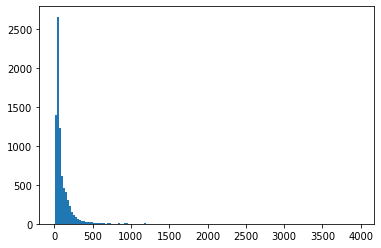

In [50]:
import matplotlib.pyplot as plt
plt.hist(df['len_question'], bins=150 )

In [51]:
#on voit ci-haut que peu de questions sont hyper longues
df.sort_values(by = 'len_question')

,ID,question,intention,len_question
3310,3310,xanax,22,5
6266,6266,Hello,1,5
342,342,REJET,14,5
3970,3970,ixel ?,22,6
556,556,norset,22,6
...,...,...,...,...
503,503,"bonjour, je souhaiterais savoir auprès de ceux...",26,1866
7956,7956,bonjour je suis perdue.. apres presque 6 mois ...,11,1907
961,961,je ne pensais pas avoir ce problème quand j'ai...,28,2008
1363,1363,"je prends effexor lp depuis des années, de 1 à...",0,2318


In [52]:
#Pour voir si on peut alleger les donnees plus tard pour les algo gourmands en temps
#df[df['len_question'] > 1000] => 28 questions superierusa 1000 mots
df[df['len_question'] > 800].count()

ID              48
question        48
intention       48
len_question    48
dtype: int64

In [53]:
df[df['len_question'] == 3978]['question'].iloc[0]

'bonsoir, je suppose que ce sujet est récurrent, mais étant très angoissée (et très fatiguée), je ne peux m\'empêcher de vous expliquer la situation sans faire toutes les pages du forum (ça fait déjà 20min que je tourne sur différents sites &amp; forums). alors voilà: j\'ai 20 ans &amp; je prends la pilule leeloo gé depuis environ 1 an maintenant. je ne l\'avais jamais oublié jusqu\'ici. le seul problème rencontré est l\'apparition de tâches brunes à 2 reprises (avec un cycle sans problème entre les 2) - plus importantes &amp; plus précoces la 2ème fois. ma gynécologue m\'a confirmée que cela pouvait venir d\'une carence en progestérone (étant donné que je ne suis pas très épaisse - la progestérone se stocke dans la graisse &amp; est responsable de la fixation de l\'ovule dans l\'utérus en cas de grossesse, la pilule a donc pour but de faire chuter son taux en fin de cycle, mais étant carencée ce taux a tendance à chuter plus tôt que prévu chez moi, et donc à me provoquer des pertes de

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12715bc88>,
      dtype=object)

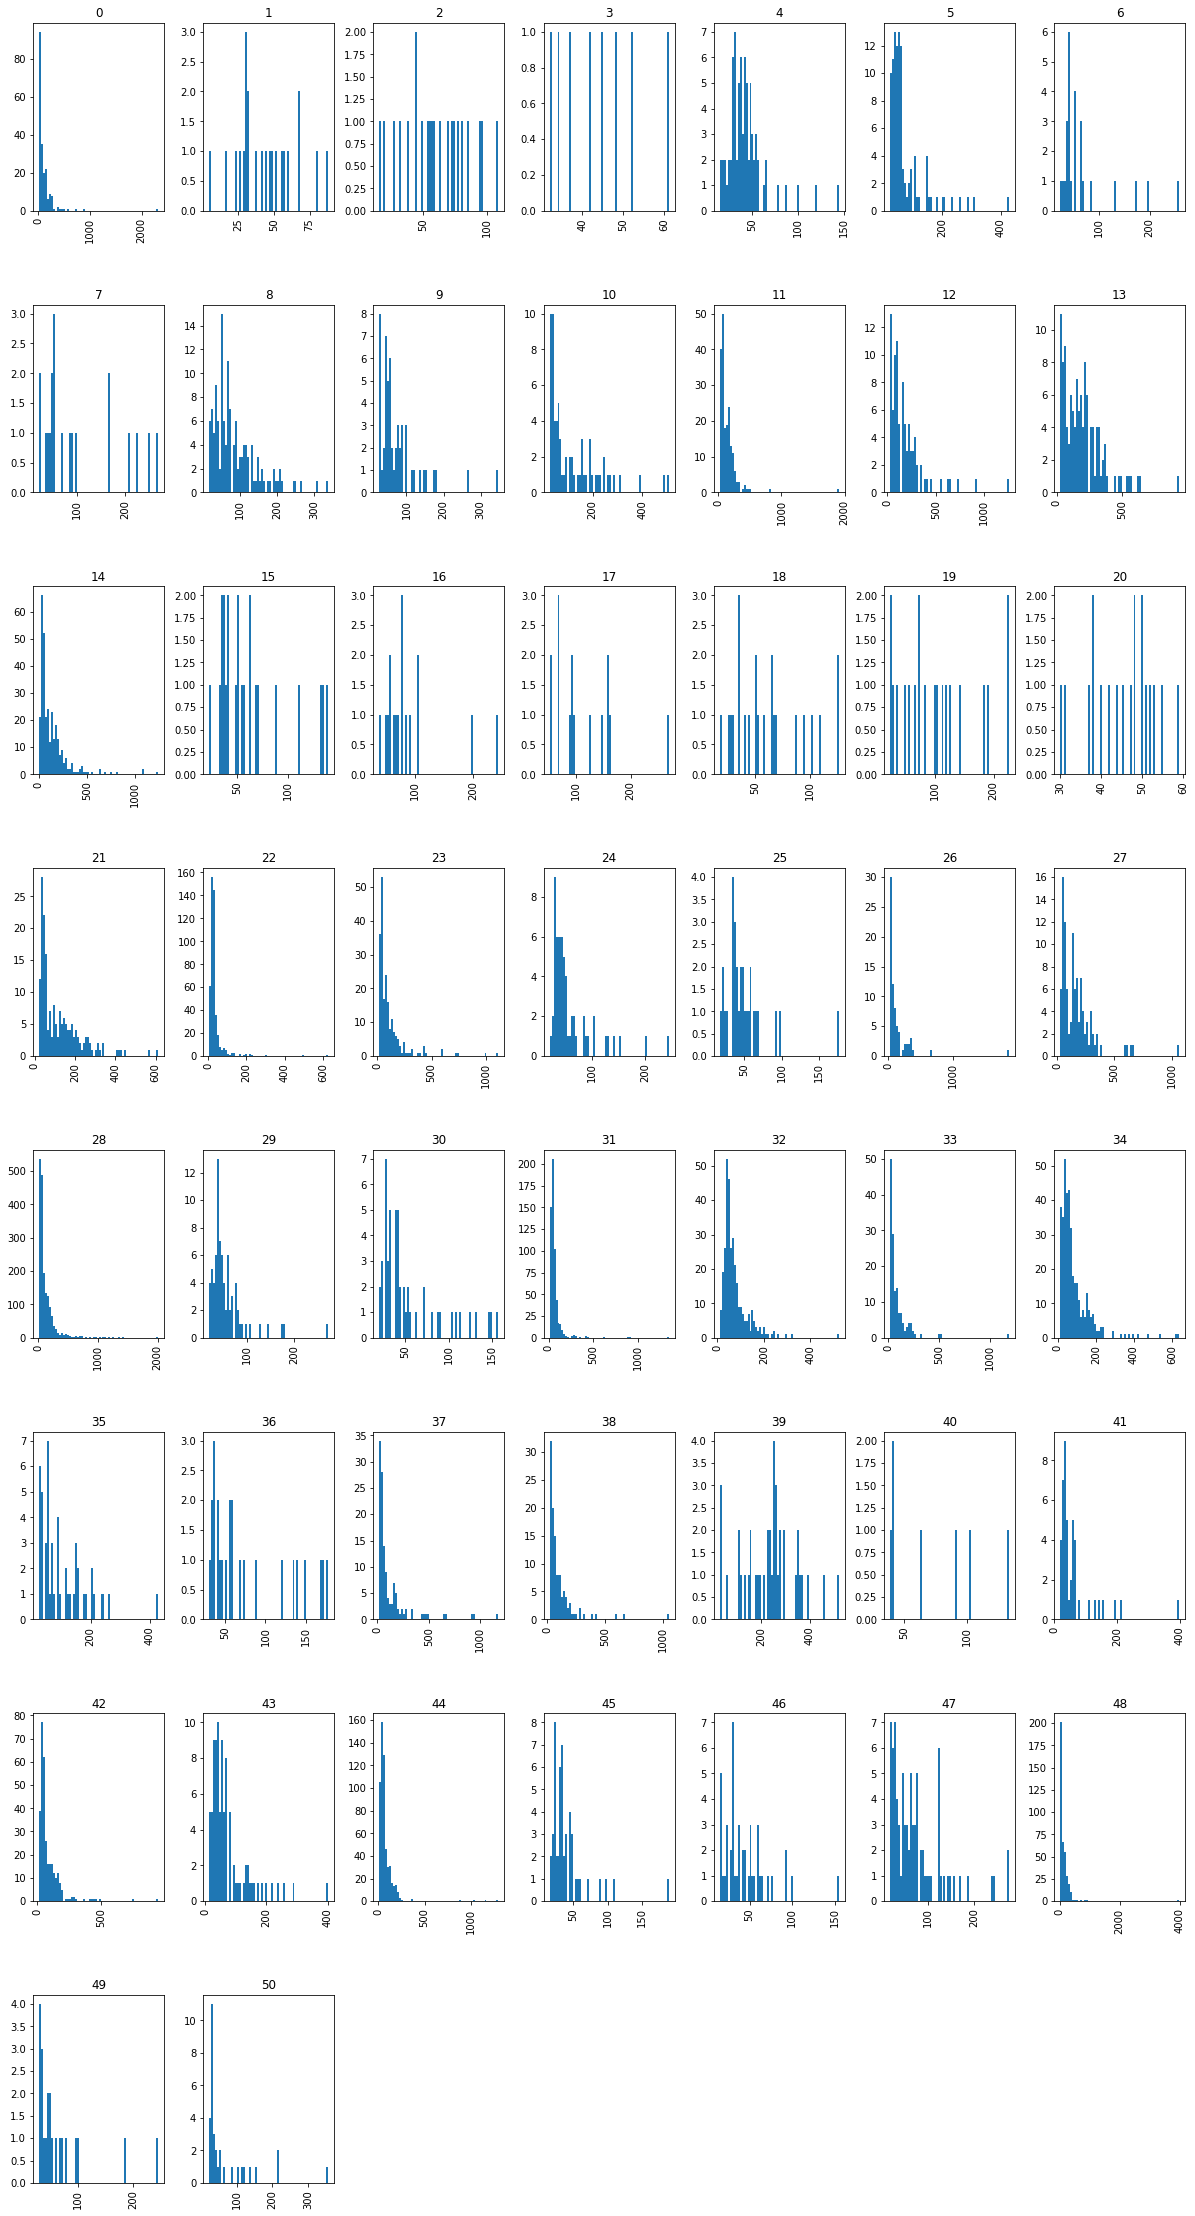

In [34]:
#Pour voir si length_question est un caractere qui peut distinguer les categories.
#On voit que les intervalles de variations sont differents entre categories mais
#c'est tout 
df.hist(column = 'len_question', by= 'intention', bins=60, figsize =(20,40))

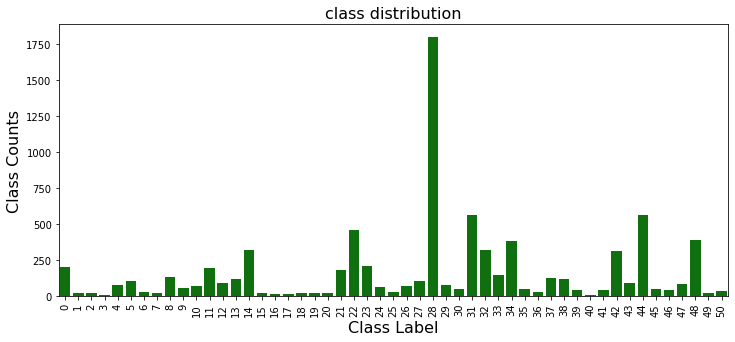

In [54]:
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
sns.countplot(x=df['intention'],color = 'green')
plt.title('class distribution', fontsize=16)
plt.ylabel('Class Counts', fontsize=16)
plt.xlabel('Class Label', fontsize=16)
plt.xticks(rotation='vertical');

# 3- DATA processing

In [55]:
from nltk.corpus import stopwords
stopwords.words('french')

['au',
 'aux',
 'avec',
 'ce',
 'ces',
 'dans',
 'de',
 'des',
 'du',
 'elle',
 'en',
 'et',
 'eux',
 'il',
 'ils',
 'je',
 'la',
 'le',
 'les',
 'leur',
 'lui',
 'ma',
 'mais',
 'me',
 'même',
 'mes',
 'moi',
 'mon',
 'ne',
 'nos',
 'notre',
 'nous',
 'on',
 'ou',
 'par',
 'pas',
 'pour',
 'qu',
 'que',
 'qui',
 'sa',
 'se',
 'ses',
 'son',
 'sur',
 'ta',
 'te',
 'tes',
 'toi',
 'ton',
 'tu',
 'un',
 'une',
 'vos',
 'votre',
 'vous',
 'c',
 'd',
 'j',
 'l',
 'à',
 'm',
 'n',
 's',
 't',
 'y',
 'été',
 'étée',
 'étées',
 'étés',
 'étant',
 'étante',
 'étants',
 'étantes',
 'suis',
 'es',
 'est',
 'sommes',
 'êtes',
 'sont',
 'serai',
 'seras',
 'sera',
 'serons',
 'serez',
 'seront',
 'serais',
 'serait',
 'serions',
 'seriez',
 'seraient',
 'étais',
 'était',
 'étions',
 'étiez',
 'étaient',
 'fus',
 'fut',
 'fûmes',
 'fûtes',
 'furent',
 'sois',
 'soit',
 'soyons',
 'soyez',
 'soient',
 'fusse',
 'fusses',
 'fût',
 'fussions',
 'fussiez',
 'fussent',
 'ayant',
 'ayante',
 'ayantes',


In [56]:
from gensim import utils
import gensim.parsing.preprocessing as gsp

filters = [
           gsp.strip_tags, #Strip HTML and PHP tags from a string
           gsp.strip_punctuation,#strip several punctuations
           gsp.strip_multiple_whitespaces,
           gsp.strip_numeric,
           gsp.remove_stopwords, 
           gsp.strip_short, 
           gsp.stem_text,
    
          ]
#j'ai cree une stoplist ou j'ai ajoute des stopwords non presents dans la liste. J'ai tourne 
#les modeles avant d'ajouter cette stoplist et apres

def clean_text(s):
    s = s.lower()
    s = utils.to_unicode(s)
    s = s.replace('è', 'e').replace('é', 'e').replace('ê','e').replace('ô','o')
    for f in filters:
        s = f(s)
    s_stopword= [word for word in s.split() if word not in stopwords.words("french")]
    stoplist = set('merci dimanche chacun soir lundi mardi mercredi jeudi vendredi samedi \
    etant chez peux aussi suis bien autre assez apres apre sui lorsque vos au a bonjour\
    bonsoir ceux dan des tres tre de plus tard mai tou bientot beaucoup tout tous deja\
    cela etre peut vraiment ossi simplement bref pensez savoir ici weekend dernier \
    pendant aucun juste car jour prend jamais jamai devant derriere avant apres pas  \
    grand grande alors alor depuis depui plu prend prendre'.split())
    filtered_s = [word for word in s_stopword if word not in stoplist]
    return (" ".join(filtered_s))

# ATTENTION PAR LA SUITE TOUS LES MODELES SERONT ESSAYES 2 FOIS AVEC OU SANS LA STOPLIST CI-DESSUS

In [57]:
df.iloc[6820,1]

'bonsoir, je suppose que ce sujet est récurrent, mais étant très angoissée (et très fatiguée), je ne peux m\'empêcher de vous expliquer la situation sans faire toutes les pages du forum (ça fait déjà 20min que je tourne sur différents sites &amp; forums). alors voilà: j\'ai 20 ans &amp; je prends la pilule leeloo gé depuis environ 1 an maintenant. je ne l\'avais jamais oublié jusqu\'ici. le seul problème rencontré est l\'apparition de tâches brunes à 2 reprises (avec un cycle sans problème entre les 2) - plus importantes &amp; plus précoces la 2ème fois. ma gynécologue m\'a confirmée que cela pouvait venir d\'une carence en progestérone (étant donné que je ne suis pas très épaisse - la progestérone se stocke dans la graisse &amp; est responsable de la fixation de l\'ovule dans l\'utérus en cas de grossesse, la pilule a donc pour but de faire chuter son taux en fin de cycle, mais étant carencée ce taux a tendance à chuter plus tôt que prévu chez moi, et donc à me provoquer des pertes de

In [58]:
clean_text(df.iloc[6820,1])

'suppos sujet recurr angoisse fatigue empech vou expliqu situat san fair page forum fait dejà min tourn differ site amp forum voilà an amp pilul leeloo environ mainten avai oubli jusqu seul problem rencontr apparit tâche brune repris cycl san problem entr important amp precoc em foi gynecologu confirme pouvait venir carenc progesteron donn pa epaiss progesteron stock graiss amp respons fixat ovul uteru ca grossess pilul donc fair chuter taux fin cycl carence taux tendanc chuter tot prevu donc provoqu pert sang pre menstruat quelqu troubl alimentair pass pa glorieux anorexiqu donc priori pa franchement risqu tomb enceint meme peur finir steril veuill enfant voilà dimanch exceptionnel dormi copain vit encor malheureus parent tombait comm hasard pile devai commenc nouvel plaquett semain interrupt finiss dimanch quand reprend pilul stresse pri habitud laisser bureau habitud evid peur perdr trimbal partout vai mettant sac main pourtant toujour stresse amp toque fait place chambr amp fai lis

In [59]:
%matplotlib inline

from wordcloud import WordCloud

def plot_word_cloud(text):
    wordcloud_instance = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords=None,
                min_font_size = 10).generate(text) 
             
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud_instance) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show()
    

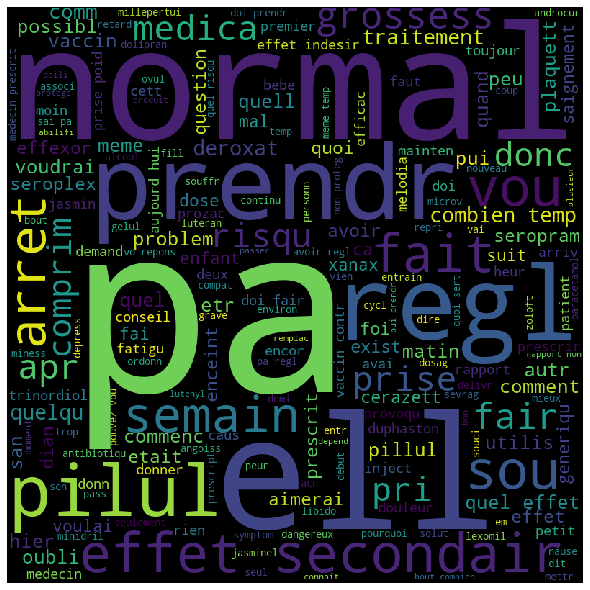

' tromp forum question repos pri premier foi hier paroxetin matin catastroph picot dasn corp annonciateur sueur froid massiv vomiss deux crise heur mat sembl passer main rest moit chaud estc normal premier foi motilium soulagera contr nause medecin prescrit adenyl em cachet maux tete terribl em palpit sueur froid chaleur intens tete tremblement fourmil levr superieur difficult respir arret medica symptom disparu dejà arriv quelqu exist form adapte enfant an micropakin medecin soign rhino pharingit prescrit amoxicillin comm anti biotiqu cett indic vien apprendr enceint savez vou poursuivr rubozinc atrax pa dangereux long term sou mercilon nause saignement atenolol quoi trinordiol fin premier plaquett premier foi copain pilul donc efficac debut douleur poitrin impress peu grossi mal ba ventr doi minkiet simplemen period dadapt laroxyl dose faibl stress psy dit prendr sertralin matin sertralin prendr matin midi sou antiobiotiqu semain chope sai quoi nenett gratt superficiel demeng point l

In [60]:
texts = ''
for index, item in df.iterrows():
    texts = texts + ' ' + clean_text(item['question'])
    
plot_word_cloud(texts)
texts

In [296]:
def plot_word_cloud_for_category(df, intention):
    text_df = df.loc[df['intention'] == str(intention)]
    texts = ''
    for index, item in df.iterrows():
        texts = texts + ' ' + clean_text(item['question'])
    
    plot_word_cloud(texts)

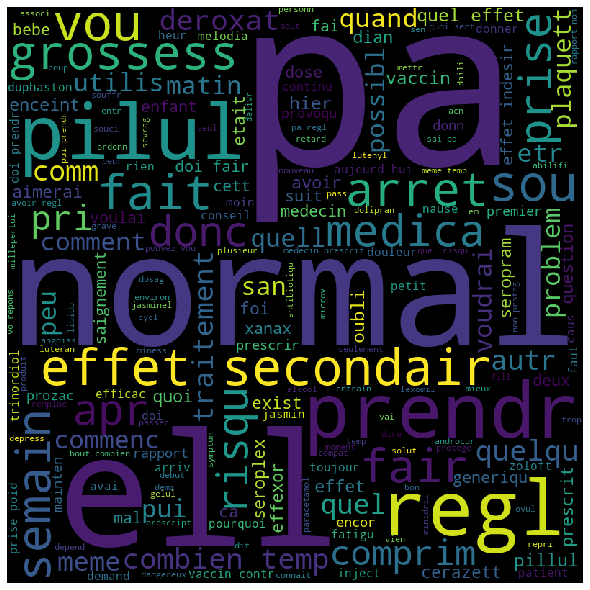

In [297]:
plot_word_cloud_for_category(df,'45')

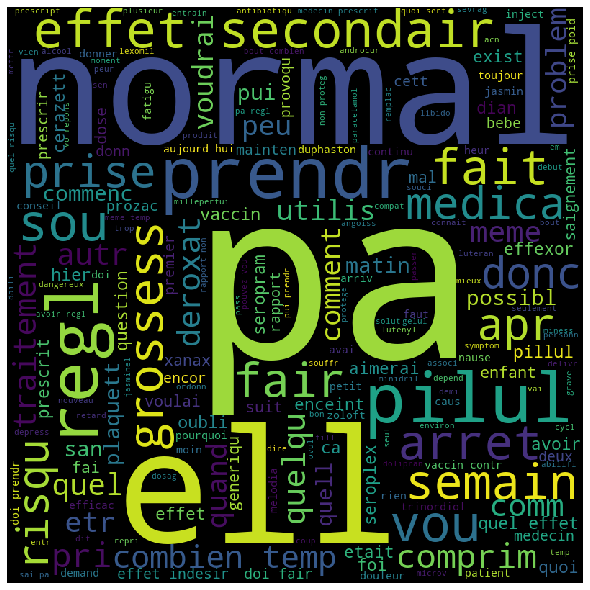

In [298]:
plot_word_cloud_for_category(df,'43')

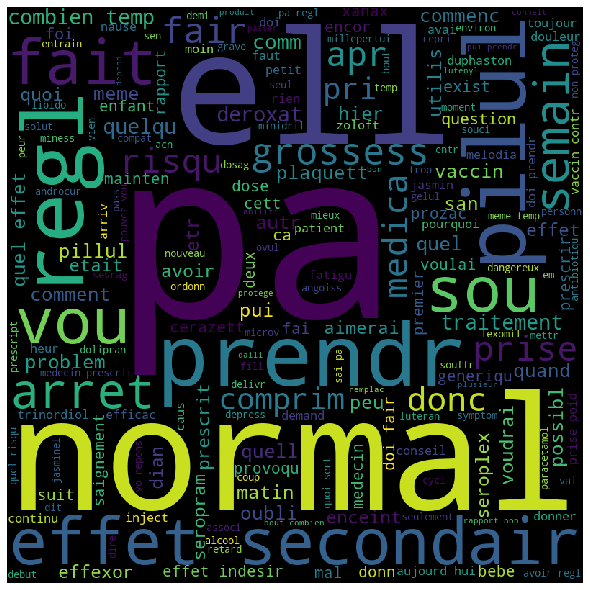

In [299]:
plot_word_cloud_for_category(df,'39')

# ON VOIT DEJA ICI QU'AUCUN MOT IMPORTANT NE RESSORT DANS LE PLOT_WORD_CLOUD DONC PROBLEME DANS LE PROCESSING DES DONNEES

# Vector space Modelling and building the pipeline

In [61]:
#Split data into features and categories
df_x= df['question']
df_y=df['intention']

### Doc2Vec


In [62]:
from gensim.models.doc2vec import TaggedDocument, Doc2Vec
from sklearn.base import BaseEstimator
from sklearn import utils as skl_utils
from tqdm import tqdm

import multiprocessing
import numpy as np

class Doc2VecTransformer(BaseEstimator):

    def __init__(self, vector_size=100, learning_rate=0.02, epochs=20):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self._model = None
        self.vector_size = vector_size
        self.workers = multiprocessing.cpu_count() - 1

    def fit(self, df_x, df_y=None):
        tagged_x = [TaggedDocument(clean_text(row).split(), [index]) for index, row in enumerate(df_x)]
        model = Doc2Vec(documents=tagged_x, vector_size=self.vector_size, workers=self.workers)

        for epoch in range(self.epochs):
            model.train(skl_utils.shuffle([x for x in tqdm(tagged_x)]), total_examples=len(tagged_x), epochs=1)
            model.alpha -= self.learning_rate
            model.min_alpha = model.alpha

        self._model = model
        return self

    def transform(self, df_x):
        return np.asmatrix(np.array([self._model.infer_vector(clean_text(row).split())
                                     for index, row in enumerate(df_x)]))

In [63]:
#We will see how does the ‘Doc2Vec’ look like by applying this transformer
doc2vec_trf = Doc2VecTransformer()
doc2vec_features = doc2vec_trf.fit(df_x).transform(df_x)
doc2vec_features

100%|██████████| 8028/8028 [00:00<00:00, 2291071.14it/s]


matrix([[ 5.3242774e-04, -3.4565234e-03, -2.5012975e-03, ...,
         -1.8255002e-03, -3.7481657e-03,  2.6721922e-03],
        [-2.4199237e-03, -5.2410230e-04,  2.9531671e-03, ...,
          1.5446929e-03,  2.6890377e-03, -2.0644740e-04],
        [-1.1303614e-04,  3.2982100e-03, -2.0172384e-03, ...,
          1.6384319e-03, -4.2326530e-03, -2.5033171e-03],
        ...,
        [-4.6928888e-03, -3.3035385e-03,  3.0043544e-03, ...,
          1.8921434e-03,  1.2889261e-03,  4.4580540e-03],
        [-3.3448602e-03,  7.8289205e-04, -3.5894245e-03, ...,
          2.7678837e-03,  3.1624429e-03,  4.4092615e-03],
        [ 2.7970117e-01, -2.1140113e-01, -4.9671233e-01, ...,
          1.1021060e+00,  1.1042434e+00, -9.7963709e-01]], dtype=float32)

# Doc2Vec and LogisticRegression pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [68]:
pl_log_reg = Pipeline(steps=[('doc2vec',Doc2VecTransformer()),
                             ('log_reg', LogisticRegression(multi_class='multinomial', solver='saga', max_iter=100))])
scores = cross_val_score(pl_log_reg, df_x, df_y, cv=5,scoring='accuracy')
print('Accuracy for Logistic Regression: ', scores.mean())

100%|██████████| 6405/6405 [00:00<00:00, 2481481.35it/s]
/Users/vsaliba-/goinfre/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
100%|██████████| 6412/6412 [00:00<00:00, 2325655.24it/s]
/Users/vsaliba-/goinfre/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
100%|██████████| 6424/6424 [00:00<00:00, 2495758.51it/s]
/Users/vsaliba-/goinfre/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
100%|██████████| 6431/6431 [00:00<00:00, 2406635.35it/s]
/Users/vsaliba-/goinfre/miniconda3/lib/python3.7/site-packages/sklearn/linea

Accuracy for Logistic Regression:  0.22397548128147657


# With Doc2Vec :  Accuracy for Logistic regression 0.2234 (avant stoplist) Accuracy for Logistic regression 0.2224 (apres stoplist)

# Doc2Vec and RandomForest pipeline

In [304]:
from sklearn.ensemble import RandomForestClassifier

pl_random_forest = Pipeline(steps=[('doc2vec',Doc2VecTransformer()),
                                   ('random_forest', RandomForestClassifier())])
scores = cross_val_score(pl_random_forest, df_x, df_y, cv=5,scoring='accuracy')
print('Accuracy for RandomForest : ', scores.mean())

100%|██████████| 6405/6405 [00:00<00:00, 2614297.11it/s]
/Users/vsaliba-/goinfre/miniconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
100%|██████████| 6412/6412 [00:00<00:00, 2262651.63it/s]
/Users/vsaliba-/goinfre/miniconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
100%|██████████| 6424/6424 [00:00<00:00, 2413058.29it/s]
/Users/vsaliba-/goinfre/miniconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
100%|██████████| 6431/6431 [00:00<00:00, 2498478.05it/s]
/Users/vsaliba-/goi

Accuracy for RandomForest :  0.195724319791228


# With Doc2Vec :  Accuracy for RandomForest 0.1972 (avant stoplist) Accuracy for RandomForest 0.1957 (apres stoplist)

# Doc2Vec and XGBoost pipeline

In [305]:
import xgboost as xgb

pl_xgb = Pipeline(steps=[('doc2vec',Doc2VecTransformer()),
                         ('xgboost', xgb.XGBClassifier(objective='multi:softmax'))])
scores = cross_val_score(pl_xgb, df_x, df_y, cv=5)
print('Accuracy for XGBoost Classifier : ', scores.mean())

100%|██████████| 6440/6440 [00:00<00:00, 2584073.26it/s]


Accuracy for XGBoost Classifier :  0.2446393734114495


# With Doc2Vec :  Accuracy for XGBoost 0.1972 (avant stoplist) Accuracy for XGBoost 0.2446 (apres stoplist)

# Tf_Idf


In [306]:
from sklearn.feature_extraction.text import TfidfVectorizer

class Text2TfIdfTransformer(BaseEstimator):

    def __init__(self):
        self._model = TfidfVectorizer()
        pass

    def fit(self, df_x, df_y=None):
        df_x = df_x.apply(lambda x : clean_text(x))
        self._model.fit(df_x)
        return self

    def transform(self, df_x):
        return self._model.transform(df_x)

In [307]:
#transform the texts
tfidf_transformer = Text2TfIdfTransformer()
tfidf_vectors = tfidf_transformer.fit(df_x).transform(df_x)


In [308]:
tfidf_vectors.shape


(8028, 6779)

In [309]:
print(tfidf_vectors)

  (0, 6457)	0.30142377836518836
  (0, 5989)	0.2750148322828653
  (0, 5120)	0.19638800731117295
  (0, 4493)	0.22279695339349603
  (0, 4176)	0.1525664626749563
  (0, 3730)	0.18752508493971357
  (0, 3727)	0.3387934273881087
  (0, 2946)	0.19638800731117295
  (0, 2640)	0.28010238575927093
  (0, 2356)	0.26118811281459997
  (0, 2206)	0.3193309427472461
  (0, 1838)	0.18409032313651125
  (0, 1629)	0.3542416705298346
  (0, 345)	0.3542416705298346
  (1, 5851)	0.6672205680303275
  (1, 3991)	0.559284753824371
  (1, 2356)	0.4919525157338865
  (2, 6454)	0.30305491329522594
  (2, 5110)	0.1699170559786311
  (2, 4883)	0.17878025965232677
  (2, 4293)	0.36649579058680015
  (2, 3944)	0.36649579058680015
  (2, 3735)	0.24648670363113004
  (2, 3065)	0.29271302997112614
  (2, 2356)	0.27022327371787613
  :	:
  (8021, 4804)	0.5879440953856322
  (8021, 2356)	0.580244114811298
  (8022, 3885)	0.7135856780725482
  (8022, 3515)	0.7005679696144705
  (8023, 6454)	0.5016764256756139
  (8023, 2356)	0.4473270029484215
  (

# Tf-Idf & LogisticRegression

In [310]:
pl_log_reg_tf_idf = Pipeline(steps=[('tfidf',Text2TfIdfTransformer()),
                             ('log_reg', LogisticRegression(multi_class='multinomial', solver='saga', max_iter=100))])
scores = cross_val_score(pl_log_reg_tf_idf, df_x, df_y, cv=5,scoring='accuracy')
print('Accuracy for Tf-Idf & Logistic Regression: ', scores.mean())

/Users/vsaliba-/goinfre/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/vsaliba-/goinfre/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/vsaliba-/goinfre/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/vsaliba-/goinfre/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for Tf-Idf & Logistic Regression:  0.3858063274876734


/Users/vsaliba-/goinfre/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


# Tf_Idf LogisticRegression accuracy = 0.4093 (avant stoplist) LogisticRegression accuracy = 0.3858 (apres stoplist)


# Tf-Idf & RandomForest

In [311]:
pl_random_forest_tf_idf = Pipeline(steps=[('tfidf',Text2TfIdfTransformer()),
                                   ('random_forest', RandomForestClassifier())])
scores = cross_val_score(pl_random_forest_tf_idf, df_x, df_y, cv=5,scoring='accuracy')
print('Accuracy for Tf-Idf & RandomForest : ', scores.mean())

/Users/vsaliba-/goinfre/miniconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/vsaliba-/goinfre/miniconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/vsaliba-/goinfre/miniconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/vsaliba-/goinfre/miniconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarni

Accuracy for Tf-Idf & RandomForest :  0.3873928367388822


# Tf-Idf  RandomForest accuracy:  0.41928706681670125 (avant stoplist)  RandomForest accuracy :  0.3873928367388822 (apres stoplist)

# Tf-Idf & XGBoost

In [ ]:
pl_xgb_tf_idf = Pipeline(steps=[('tfidf',Text2TfIdfTransformer()),
                         ('xgboost', xgb.XGBClassifier(objective='multi:softmax'))])
scores = cross_val_score(pl_xgb_tf_idf, df_x, df_y, cv=5)
print('Accuracy for Tf-Idf & XGBoost Classifier : ', scores.mean())

# Tf-Idf  XGBoost Classifier accuracy:  0.4139303112849596 (avant stoplist) XGBoost Classifier accuracy :  0.38145513480347776 (apres stoplist